In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
population = pd.read_csv("D:\Amila\MBA\Research\Data\Mid-year_population_by_district.csv",header = 0 )

In [3]:
import urllib
params ='DRIVER={SQL Server};SERVER=CL-AMILAH\AMILA;DATABASE=GSH;UID=Amila;Trusted_Connection=yes;'         
params = urllib.parse.quote_plus(params)

from sqlalchemy import create_engine
db = create_engine('mssql+pyodbc:///?odbc_connect=%s' % params)

In [4]:
population.head()

,District,2018 -Total,2018 -Male,2018 - Female,2019Total,2019 -Male,2019 - Female,2020 -Total,2020 -Male,2020 - Female
0,Colombo,2439,1197,1242,2448,1201,1247,2455,1205,1250
1,Gampaha,2409,1167,1242,2417,1171,1246,2423,1174,1249
2,Kalutara,1281,620,661,1284,621,663,1287,623,664
3,Kandy,1468,700,768,1476,704,772,1483,707,776
4,Matale,519,250,269,522,252,270,525,253,272


In [5]:
population = population [["District", "2019Total"]]

In [6]:
sql = '''
SELECT inv.[ID] , [Date] , [OutletUID] ,ot.Name AS outlet ,pr.Description AS province , di.Description AS district 
, ar.Description AS Area , inv.[AgentUID] ,Concat(emp.FirstName ,' ' , emp.MiddleInitials , ' ', emp.LastName ) AS AgentName , inv.[DistributorUID] , d.Name AS distributor, [ItemUID] ,it.Description AS item, [UnitQty] 
, [UnitPrice] , [RetailUnitPrice] , [FreeQty] , [FreeCompanyQty] , [GrossValue]
,datename(YEAR, Date) AS Year
,datename(month, Date) AS MonthName
,MONTH(Date) AS Month
,datename(DAY, Date) AS Day
,DATEPART(DW,Date) AS WeekDay
,datename(WEEKDAY, Date) AS DateName
,DATEPART (hh,Date) as Hour

  FROM [GSH].[dbo].[vw_Invoice] inv
  LEFT JOIN [GSH].[dbo].[vw_InvoiceLine] invl
  ON inv.siteUID = invl.TxnInvoice_SiteUID AND inv.uid = invl.TxnInvoiceUID	
  LEFT JOIN [GSH].[dbo].[Item] it
  ON invl.ItemUID = it.UID
  LEFT JOIN [GSH].[dbo].[Outlet] ot
  ON inv.OutletUID = ot.UID
  LEFT JOIN [GSH].[dbo].[Area] pr
  ON ot.ProvinceUID = pr.UID
  LEFT JOIN [GSH].[dbo].[Area] di
  ON ot.DistrictUID = di.UID
  LEFT JOIN [GSH].[dbo].[Area] ar
  ON ot.AreaUID = ar.UID
  LEFT JOIN [GSH].[dbo].[Distributor] d
  ON inv.DistributorUID = d.UID
  LEFT JOIN [GSH].[dbo].[avLogin] avlg
  ON inv.AgentUID = avlg.BusinessUserUID
  LEFT JOIN [GSH].[dbo].[Employee] emp
  ON avlg.EmployeeUID = emp.UID
  WHERE inv.mpt_TypeEnum IN ( 21 , 44, 14, 1) AND inv.ExpiryDate IS NULL AND inv.SubmittedDate IS NOT NULL;
'''

invoice_All = pd.read_sql_query(sql, db)

In [7]:
#disply all the columns
pd.set_option('display.max_columns', None)

In [8]:
# select 2019 sales records 
invoice_All = invoice_All.loc[invoice_All['Year'] == '2019']

In [9]:
invoice_All.head()

,ID,Date,OutletUID,outlet,province,district,Area,AgentUID,AgentName,DistributorUID,distributor,ItemUID,item,UnitQty,UnitPrice,RetailUnitPrice,FreeQty,FreeCompanyQty,GrossValue,Year,MonthName,Month,Day,WeekDay,DateName,Hour
78359,CSO015600304,2019-01-07 16:01:48.247,1793,Sisira Pharmacy,Western Province,Colombo,Kaluaggala,156,,10,Multi Pharma,168,ES-Loprot Cap 20mg 14's,2.0,260.45,296.9,0.0,0.0,520.9,2019,January,1,7,2,Monday,16
78360,CSO010901128,2019-01-07 16:07:47.903,642,Dilcare Pharmacy,North Western Province,Kurunegala,Nikaweratiya,109,Shalika Asitha,16,W.J.Pharmaceuticals (Pvt) Ltd,159,Biolysine Syrup 120ml,3.0,202.70,231.0,0.0,0.0,608.1,2019,January,1,7,2,Monday,16
78361,CSO008100914,2019-01-07 16:42:21.560,549,Medi Care Pharmacy,North Western Province,Kurunegala,Rideegama,81,Sampath Ranasinghe,3,Dharshana Distributors,2,Gentamicin Cream 15 mg,2.0,258.75,295.0,0.0,0.0,517.5,2019,January,1,7,2,Monday,16
78362,CSO008100911,2019-01-07 16:48:49.010,555,New City Pharmacy,North Western Province,Kurunegala,Mawathagama,81,Sampath Ranasinghe,3,Dharshana Distributors,2,Gentamicin Cream 15 mg,2.0,258.75,295.0,0.0,0.0,517.5,2019,January,1,7,2,Monday,16
78363,CSO009301155,2019-01-07 16:59:29.727,918,New Tharul Pharmacy,Western Province,Colombo,Gonapola,93,Amith Gayashan,9,Multy Drugs (Pvt) Ltd,2,Gentamicin Cream 15 mg,10.0,258.75,295.0,0.0,0.0,2587.5,2019,January,1,7,2,Monday,16


In [10]:
District_Sales = invoice_All.groupby("district").agg({'UnitQty':'sum' , 'GrossValue':'sum'}).reset_index()

In [11]:
District_Sales.head()

,district,UnitQty,GrossValue
0,Ampara,133539.0,5.898230e+07
1,Anuradhapura,152982.0,6.143256e+07
2,Badulla,116635.0,4.825869e+07
3,Batticaloa,111092.0,4.293472e+07
4,Colombo,1293959.0,6.014411e+08


In [12]:
Sales_Population = pd.merge(District_Sales,population,  how = 'left' , left_on = ['district']  , right_on = ['District'])

In [13]:
Sales_Population

,district,UnitQty,GrossValue,District,2019Total
0,Ampara,133539.0,5.898230e+07,Ampara,728
1,Anuradhapura,152982.0,6.143256e+07,Anuradhapura,937
2,Badulla,116635.0,4.825869e+07,Badulla,880
3,Batticaloa,111092.0,4.293472e+07,Batticaloa,575
4,Colombo,1293959.0,6.014411e+08,Colombo,2448
5,Galle,411080.0,1.412243e+08,Galle,1130
6,Gampaha,704877.0,3.249063e+08,Gampaha,2417
7,Hambantota,216315.0,7.433656e+07,Hambantota,661
8,Jaffna,102947.0,3.844043e+07,Jaffna,617
9,Kalutara,386595.0,1.545987e+08,Kalutara,1284


In [14]:
Sales_Population["PerPersonQty"] = Sales_Population["UnitQty"] / (Sales_Population["2019Total"] *1000)
Sales_Population["PerPersonSales"] = Sales_Population["GrossValue"] / (Sales_Population["2019Total"] *1000)
Sales_Population["PerUnitExpenditure"] = Sales_Population["GrossValue"] / Sales_Population["UnitQty"]

In [15]:
Sales_Population

,district,UnitQty,GrossValue,District,2019Total,PerPersonQty,PerPersonSales,PerUnitExpenditure
0,Ampara,133539.0,5.898230e+07,Ampara,728,0.183433,81.019645,441.685960
1,Anuradhapura,152982.0,6.143256e+07,Anuradhapura,937,0.163268,65.563027,401.567222
2,Badulla,116635.0,4.825869e+07,Badulla,880,0.132540,54.839424,413.758249
3,Batticaloa,111092.0,4.293472e+07,Batticaloa,575,0.193203,74.669086,386.478992
4,Colombo,1293959.0,6.014411e+08,Colombo,2448,0.528578,245.686707,464.806890
5,Galle,411080.0,1.412243e+08,Galle,1130,0.363788,124.977214,343.544448
6,Gampaha,704877.0,3.249063e+08,Gampaha,2417,0.291633,134.425425,460.940352
7,Hambantota,216315.0,7.433656e+07,Hambantota,661,0.327254,112.460750,343.649565
8,Jaffna,102947.0,3.844043e+07,Jaffna,617,0.166851,62.302155,373.400192
9,Kalutara,386595.0,1.545987e+08,Kalutara,1284,0.301086,120.403991,399.898408


### What is relationship of sales and population

<ipython-input-32-871ba1164c68>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(District_Sales.district,rotation='vertical', size=8)
<ipython-input-32-871ba1164c68>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


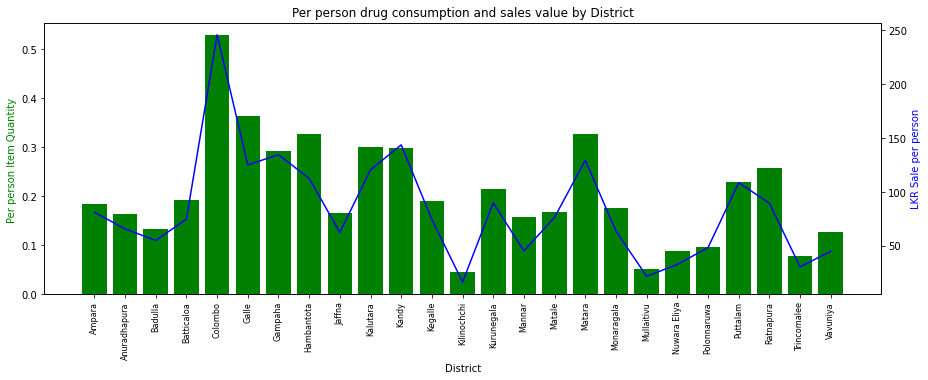

In [32]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Sales_Population.district, Sales_Population.PerPersonQty, color='g')
ax2.plot(Sales_Population.district, Sales_Population.PerPersonSales, color='b')

ax1.set_xlabel('District')
ax1.set_ylabel('Per person Item Quantity ', color='g')
ax2.set_ylabel('LKR Sale per person', color='b')
plt.title("Per person drug consumption and sales value by District")
plt.rcParams['figure.figsize'] = [15, 5]
ax1.set_xticklabels(District_Sales.district,rotation='vertical', size=8)

fig.show()

### Takeaway point
Highest per person drug consumption and expenditure is shown in Colombo district 
Lowest per person drug consumption and expenditure is shown in Kilinochchi district


<ipython-input-17-c38c6e793437>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(District_Sales.district,rotation='vertical', size=8)
<ipython-input-17-c38c6e793437>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


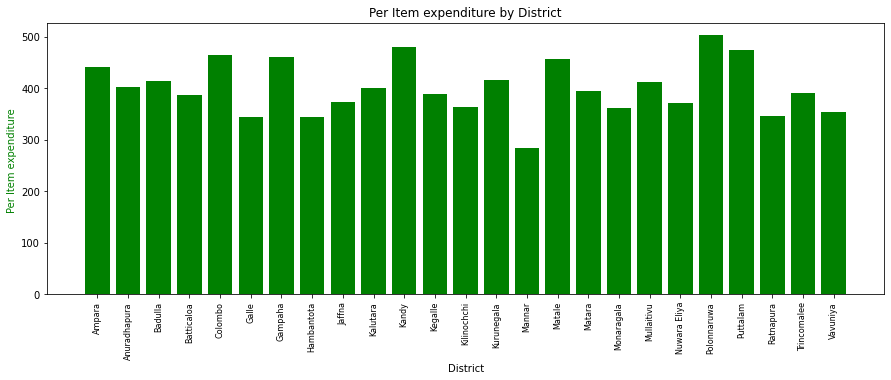

In [17]:
fig, ax1 = plt.subplots()
ax1.bar(Sales_Population.district, Sales_Population.PerUnitExpenditure, color='g')

ax1.set_xlabel('District')
ax1.set_ylabel('Per Item expenditure ', color='g')
plt.title("Per Item expenditure by District")
plt.rcParams['figure.figsize'] = [15, 5]
ax1.set_xticklabels(District_Sales.district,rotation='vertical', size=8)

fig.show()

### Takeaway point
###### Highest per Item expenditure is shown in Polonnaruwa district and Kandy , Puttalam respectively
###### Lowest per Item expenditure is shown in Mannar district

### What is the relationship between population and unit sold ?

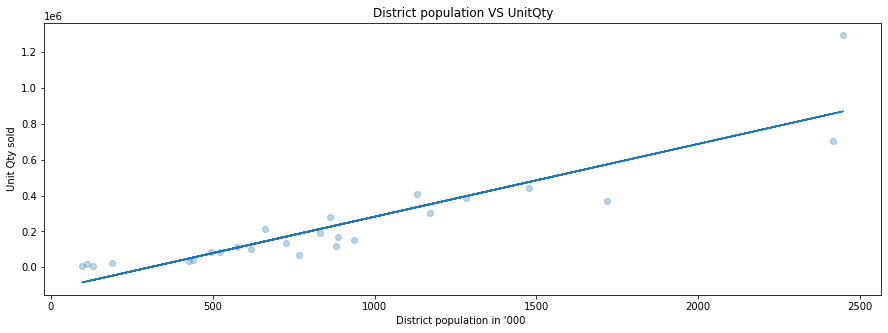

In [18]:
plt.scatter(Sales_Population["2019Total"], Sales_Population.UnitQty , alpha=0.3,cmap='viridis')

# m = slope, b=intercept
m, b = np.polyfit(Sales_Population["2019Total"], Sales_Population.UnitQty, 1)
# y = mx +c
plt.plot(Sales_Population["2019Total"], m*Sales_Population["2019Total"] + b)
plt.xlabel("District population in '000 ")
plt.ylabel("Unit Qty sold")
plt.title("District population VS UnitQty")
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

In [19]:
Sales_Population.corr(method ='pearson')

,UnitQty,GrossValue,2019Total,PerPersonQty,PerPersonSales,PerUnitExpenditure
UnitQty,1.000000,0.994891,0.905987,0.865187,0.923045,0.354168
GrossValue,0.994891,1.000000,0.896497,0.830023,0.909274,0.407608
2019Total,0.905987,0.896497,1.000000,0.751013,0.818806,0.429020
PerPersonQty,0.865187,0.830023,0.751013,1.000000,0.968185,0.149700
PerPersonSales,0.923045,0.909274,0.818806,0.968185,1.000000,0.364806
PerUnitExpenditure,0.354168,0.407608,0.429020,0.149700,0.364806,1.000000


### Takeaway point
###### There is possitive relationship between population and number of units sold

### What is relationship of sales and income

In [20]:
income = pd.read_csv("D:\Amila\MBA\Research\Data\Income\Mean and median monthly household income - 2016.csv",header = 0 )

In [21]:
income.head()

,District,Mean,Median
0,Colombo,104581,70000
1,Gampaha,72834,53123
2,Kalutara,69171,49106
3,Kandy,55194,41858
4,Matale,56075,42579


In [22]:
Sales_Income = pd.merge(District_Sales,income,  how = 'left' , left_on = ['district']  , right_on = ['District'])

In [23]:
Sales_Income

,district,UnitQty,GrossValue,District,Mean,Median
0,Ampara,133539.0,5.898230e+07,Ampara,43821,34486
1,Anuradhapura,152982.0,6.143256e+07,Anuradhapura,58326,41629
2,Badulla,116635.0,4.825869e+07,Badulla,53236,36870
3,Batticaloa,111092.0,4.293472e+07,Batticaloa,40356,28297
4,Colombo,1293959.0,6.014411e+08,Colombo,104581,70000
5,Galle,411080.0,1.412243e+08,Galle,63093,45333
6,Gampaha,704877.0,3.249063e+08,Gampaha,72834,53123
7,Hambantota,216315.0,7.433656e+07,Hambantota,59932,42539
8,Jaffna,102947.0,3.844043e+07,Jaffna,47731,35500
9,Kalutara,386595.0,1.545987e+08,Kalutara,69171,49106


In [24]:
Sales_Income["QtyperMeanIncome"] = Sales_Income["UnitQty"] / Sales_Income["Mean"] 
Sales_Income["SalesperMeanIncome"] = Sales_Income["GrossValue"] / Sales_Income["Mean"] 

In [25]:
Sales_Income

,district,UnitQty,GrossValue,District,Mean,Median,QtyperMeanIncome,SalesperMeanIncome
0,Ampara,133539.0,5.898230e+07,Ampara,43821,34486,3.047375,1345.982552
1,Anuradhapura,152982.0,6.143256e+07,Anuradhapura,58326,41629,2.622878,1053.261955
2,Badulla,116635.0,4.825869e+07,Badulla,53236,36870,2.190905,906.504873
3,Batticaloa,111092.0,4.293472e+07,Batticaloa,40356,28297,2.752800,1063.899400
4,Colombo,1293959.0,6.014411e+08,Colombo,104581,70000,12.372792,5750.959152
5,Galle,411080.0,1.412243e+08,Galle,63093,45333,6.515461,2238.350558
6,Gampaha,704877.0,3.249063e+08,Gampaha,72834,53123,9.677856,4460.914579
7,Hambantota,216315.0,7.433656e+07,Hambantota,59932,42539,3.609341,1240.348321
8,Jaffna,102947.0,3.844043e+07,Jaffna,47731,35500,2.156816,805.355630
9,Kalutara,386595.0,1.545987e+08,Kalutara,69171,49106,5.588975,2235.022265


<ipython-input-26-98017a934937>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(District_Sales.district,rotation='vertical', size=8)
<ipython-input-26-98017a934937>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


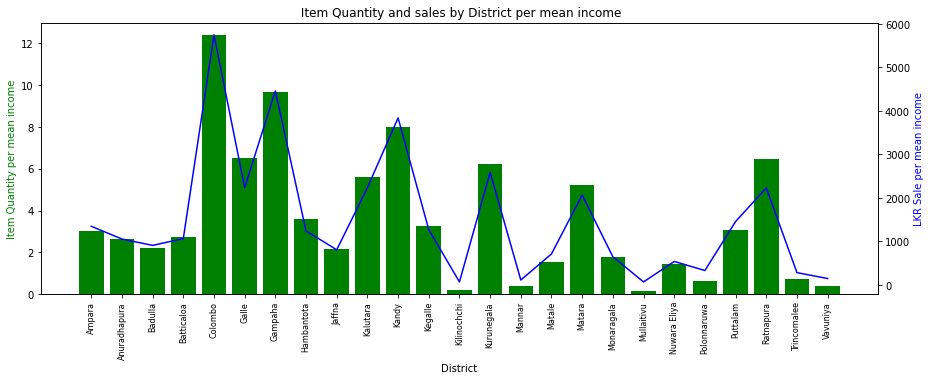

In [26]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Sales_Income.district, Sales_Income.QtyperMeanIncome, color='g')
ax2.plot(Sales_Income.district, Sales_Income.SalesperMeanIncome, color='b')

ax1.set_xlabel('District')
ax1.set_ylabel('Item Quantity per mean income', color='g')
ax2.set_ylabel('LKR Sale per mean income', color='b')
plt.title(" Item Quantity and sales by District per mean income")
plt.rcParams['figure.figsize'] = [15, 5]
ax1.set_xticklabels(District_Sales.district,rotation='vertical', size=8)

fig.show()

### Takeaway point
###### Highest item quantity and sales value per mean income is shown in Colombo district
###### Lowest item quantity and sales value per mean income is shown in Kilinochchi Mullaitivu	

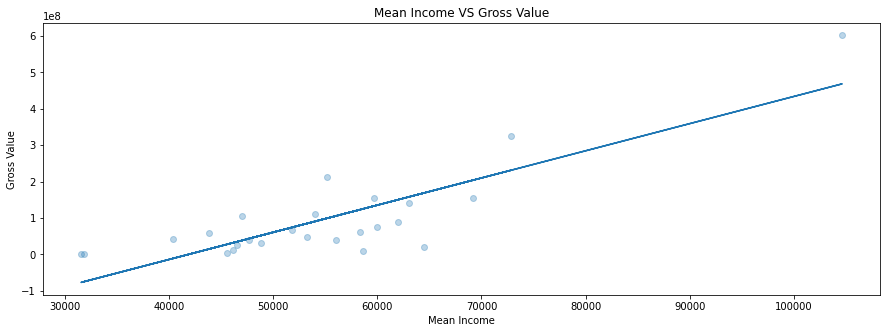

In [27]:
plt.scatter(Sales_Income.Mean, Sales_Income.GrossValue, alpha=0.3,cmap='viridis')

# m = slope, b=intercept
m, b = np.polyfit(Sales_Income.Mean,Sales_Income.GrossValue, 1)
# y = mx +c
plt.plot(Sales_Income.Mean, m*Sales_Income.Mean + b)



plt.xlabel("Mean Income")
plt.ylabel("Gross Value")
plt.title("Mean Income VS Gross Value")
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

In [28]:
Sales_Income.corr(method ='pearson')

,UnitQty,GrossValue,Mean,Median,QtyperMeanIncome,SalesperMeanIncome
UnitQty,1.000000,0.994891,0.841240,0.846795,0.943571,0.955924
GrossValue,0.994891,1.000000,0.840200,0.845883,0.922773,0.950364
Mean,0.841240,0.840200,1.000000,0.983948,0.731200,0.751212
Median,0.846795,0.845883,0.983948,1.000000,0.744427,0.765402
QtyperMeanIncome,0.943571,0.922773,0.731200,0.744427,1.000000,0.988086
SalesperMeanIncome,0.955924,0.950364,0.751212,0.765402,0.988086,1.000000


### remove colombo 

In [29]:
# select 2019 sales records 
Sales_Income_No_outlier = Sales_Income.loc[Sales_Income['district'] != 'Colombo']

In [30]:
Sales_Income_No_outlier

,district,UnitQty,GrossValue,District,Mean,Median,QtyperMeanIncome,SalesperMeanIncome
0,Ampara,133539.0,5.898230e+07,Ampara,43821,34486,3.047375,1345.982552
1,Anuradhapura,152982.0,6.143256e+07,Anuradhapura,58326,41629,2.622878,1053.261955
2,Badulla,116635.0,4.825869e+07,Badulla,53236,36870,2.190905,906.504873
3,Batticaloa,111092.0,4.293472e+07,Batticaloa,40356,28297,2.752800,1063.899400
5,Galle,411080.0,1.412243e+08,Galle,63093,45333,6.515461,2238.350558
6,Gampaha,704877.0,3.249063e+08,Gampaha,72834,53123,9.677856,4460.914579
7,Hambantota,216315.0,7.433656e+07,Hambantota,59932,42539,3.609341,1240.348321
8,Jaffna,102947.0,3.844043e+07,Jaffna,47731,35500,2.156816,805.355630
9,Kalutara,386595.0,1.545987e+08,Kalutara,69171,49106,5.588975,2235.022265
10,Kandy,441104.0,2.118817e+08,Kandy,55194,41858,7.991883,3838.854610


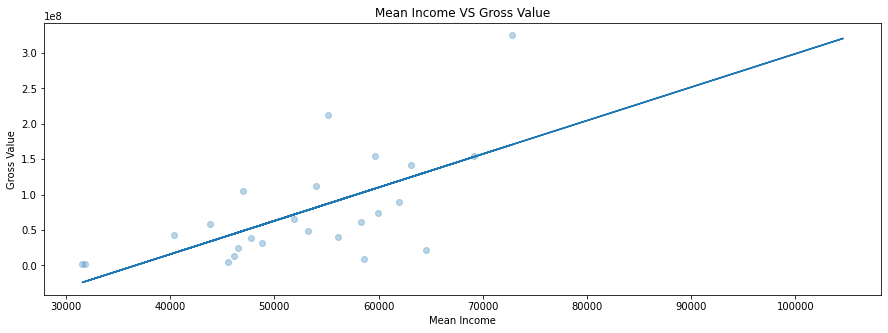

In [31]:
plt.scatter(Sales_Income_No_outlier.Mean, Sales_Income_No_outlier.GrossValue, alpha=0.3,cmap='viridis')

# m = slope, b=intercept
m, b = np.polyfit(Sales_Income_No_outlier.Mean,Sales_Income_No_outlier.GrossValue, 1)
# y = mx +c
plt.plot(Sales_Income.Mean, m*Sales_Income.Mean + b)



plt.xlabel("Mean Income")
plt.ylabel("Gross Value")
plt.title("Mean Income VS Gross Value")
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

### Takeaway point
###### There is a possitive relationship with mean income and gross drug sales value